In [1]:
from agents.llama2_agent import LLama2Agent

2024-02-06 17:15:08.668679: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Llama 2 Agent
The finetuned Llama 2 model is loaded from the huggingface hub. This can only be done with an access token for this repository. If needed, please contact Ahmad.Khalidi@Haw-Hamburg.de for access.

In [2]:
agent = LLama2Agent()

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /home/jovyan/hf_home/token
Login successful


You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


First we are adding the nodes to the graph and ask the model to predict the relationship between those nodes. The agent responds with a flag, if the generated sequence matches the expected format. In this case we expect **\<rel1>** to be filled with an entailment  relationship. If the agent is not able to generate a matching sequence, the error is printed and we are adding the relationship manually.

In [ ]:
agent.add_node("A", "I live in Hamburg.")
agent.add_node("H", "I live nearby a river.")
_, _, _, success = agent.relation_between("A", "H")
if not success:
    agent.add_edge("A", "H", "neu", generated=1)
agent.display_Graph()

The model was not able to generate a sequence in which the relationship placeholder **\<rel1>** was filled. The model responded with a statement that could be entailed from the statement **A** but does not fit our expectation of predicting the relationship.<br>

Next we are asking the model to explain the relationship between **A** and **H**. Again, if the model does not respond in a form, we expect, we add the expected nodes and edges manually.

Expected response of form '<t2><:>(.*|\s)<;>' but got '<t2><:>
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  '.


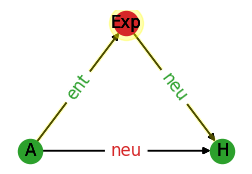

{
    "A": "I live in Hamburg.",
    "H": "I live nearby a river.",
    "Exp": "It's possible for someone to live in Hamburg and also live far away from the Elbe."
}


In [4]:
_, changed_nodes, changed_edges, success = agent.explain_relation("A", "H", "Exp")
if not success:
    agent.add_node("Exp", "It's possible for someone to live in Hamburg and also live far away from the Elbe.", generated=1)
    changed_nodes.add("Exp")
    agent.add_edge("A", "Exp", "ent")
    changed_edges.add(("A", "Exp"))
    agent.add_edge("Exp", "H", "neu")
    changed_edges.add(("Exp", "H"))
agent.display_Graph(changed_nodes, changed_edges)

This time the model responds with blank output.

Next, we ask the model to generate a new statement that has a neutral textual entailment relationship from **A**.

Expected response of form '<t2><:>(.*|\s)<;>' but got '<t2><:>I live in<|endoftext|> <|endoftext|> <|endoftext|>
  
<|endoftext|> 
<|endoftext|> 
<|endoftext|> 
<|endoftext|> 
<|endoftext|> 
<|endoftext|> 
<|endoftext|> 
<|endoftext|> 
<|endoftext|> 
<|endoftext|> 
<|endoftext|> 
<|'.


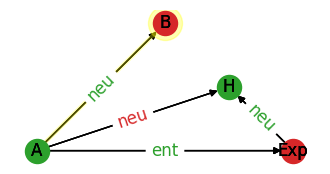

{
    "A": "I live in Hamburg.",
    "H": "I live nearby a river.",
    "Exp": "It's possible for someone to live in Hamburg and also live far away from the Elbe.",
    "B": "I live nearby the Bille."
}


In [5]:
_, changed_nodes, changed_edges, success = agent.generate_entailment("A", "B", relation="neu")    
if not success:
    agent.add_node("B", "I live nearby the Bille.", generated=1)
    changed_nodes.add("B")
    agent.add_edge("A", "B", "neu")
    changed_edges.add(("A", "B"))
agent.display_Graph(changed_nodes, changed_edges)


This time the model generates a coherent start but changes apruptly to the end of text token **\<|endoftext|>**. This token was added during training by the [DeepSpeed framework](https://github.com/microsoft/DeepSpeed).

Last, we ask the model to predict the relationship between the newly generated node **B** and the target **H**.

In [6]:
_, changed_nodes, changed_edges, success = agent.relation_between("B", "H")
if success:
    agent.display_Graph(changed_nodes, changed_edges)

Expected response of form '<rel1><:>(<ent>|<con>|<neu>|<nent>|<ncon>|<nneu>)<;>' but got '<rel1><:>I live nearby two rivers.<;>'.


The model responds, again, not with any relationship, but with a statement that could be logically inferred by the two statements **B** and **H**.